# Анализ продаж компьютерных игр в интернет-магазине.

## Описание проекта.

В проекте представлены данные до 2016 года о продаже по всему миру компьютерных игр в интернет-магазине "Стримчик", а также  оценки пользователей и экспертов, жанры и платформы представленных игр.
Анализ данных происходит в декабре 2016 года. Рекламная кампания планируется на 2017 год.

## Задачи проекта.

Необходимо: 
 - отработать принцип работы с данными; 
 - выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## План исследования.

Шаг 1. Загрузка и изучение данных.

Шаг 2. Подготовка данных к исследованию.

Шаг 3. Исследовательский анализ данных. 

Шаг 4. Составление портрета пользователя каждого региона (NA, EU, JP).

Шаг 5. Проверка гипотезы. 

Шаг 6.Общий вывод

In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
from math import factorial
import statistics

## Шаг 1. Загрузка и изучение данных.

In [2]:
#read a file with data
data = pd.read_csv('C:/Users/dnast/Downloads/Сборный проект-1/games.csv')

In [3]:
# display the head of the dataset
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# display data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**В датасете 16 715 событий, 11 колонок.** 

**Название колонок по верхнему регистру - нужно заменить на нижний по pep8.**    

**Форматы данных:** 

- Year_of_Release float64 нужно заменить на int 
- User_Score object  нужно заменить на float64. 

## Шаг 2. Подготовка данных к исследованию.

### 2.1. Приведение названий столбцов к pep8 и замена форматов данных в столбцах.

In [5]:
# change the register of column names to lower 
data.columns = [col.lower() for col in data.columns]

In [6]:
#check
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# change float64 format to Int64
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [8]:
# format check
data['year_of_release'].dtypes

Int64Dtype()

In [9]:
# display data head
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Заменены форматы данных:**

- в колонке **year_of_release** формат float64 заменён на int64, потому что годы - это всегда целые числа;
- в колонке **user_score формат** object должен быть заменён на float64, потому что оценки представлены дробными числами; но при замене выдаётся ошибка из-за значения 'tbd' в колонке. Ниже рассмотрим это значение отдельно;
- в **critic_score** в первых 5 строках видны только целые и пропуски, но менять формат float64 на int не будем, так как всё же могут быть дробные значения в датасете.

### 2.2. Поиск дубликатов.

In [10]:
# check for explicit duplicates
data.duplicated().sum()

0

**Явных дубликатов нет.**

**В таблице данные по играм с одинаковыми названиями, но на разных платформах и с разными годами выпуска. Поэтому выполним проверку дубликатов по сочетанию полей 'name', 'platform', 'year_of_release'**

In [11]:
# define duplicates by subset
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


**Было найдено 2 дубликата по сочетанию название игры, платформа, год выпуска. Посмотрим их вместе с первыми такими же строками.**

In [12]:
# show first rows with duplicates
data[data.duplicated(['name', 'platform', 'year_of_release'], keep='last')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


**С NaN в названиях мы разберёмся ниже в работе с пропусками. Для игры Madden NFL 13 видно, что первая строка содержит больше информации, чем вторая. Удалим строку с повтором (индекс 16230)**

In [13]:
# drop a row 
data = data.drop(16230, axis=0)

In [14]:
# check 
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.0,0.03,0.0,NaN,NaN,NaN


**Дубликат удалён. Строка с NaN в названии игры будет удалена ниже.**

### 2.3. Обработка пропусков.

In [15]:
# display gaps number 
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [16]:
# display gaps fraction
data.isna().mean()*100

name                0.011966
platform            0.000000
year_of_release     1.609429
genre               0.011966
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.322245
user_score         40.092138
rating             40.481034
dtype: float64

**Пропуски в данных:**

Скорее всего, из-за ошибки при выгрузке: 

- в Name и Genre 2 пропуска 
- Year_of_Release 269 пропусков (1%)

Огромный процент пропусков в оценках. Очевидно, это ошибка в выгрузке. Такой объём пропусков помешает обработке и удалить столько данных мы не можем, так как потеряем большую часть информации: 

- Critic_Score 8578 пропусков (51%)
- User_Score 6701 пропуск (40%)
- Rating 6766  пропусков (40%)

In [17]:
# display the rows with NaN in 'name' column
data.loc[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Строки c  пропусками в name всего две, в этих же строках пропуски в genre, critic_score, user_score, rating. Восстановить** **название игр невозможно, в строках много пропусков, поэтому эти события для нас неинформативны и их можно удалить.**

In [18]:
# delete rows with gaps in the columns
data = data.dropna(subset=['name'])

In [19]:
# check
data.loc[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Строки c  пропусками в name удалены.**

In [20]:
# display sorted games names with NaN in 'year_of_release' column
sorted(data[data['year_of_release'].isna()]['name'].unique())

['AKB1/48: Idol to Guam de Koishitara...',
 'Action Man-Operation Extreme',
 'Advance Wars: Days of Ruin',
 'Adventure',
 'Agarest Senki: Re-appearance',
 'Air-Sea Battle',
 'Alex Rider: Stormbreaker',
 'All-Star Baseball 2005',
 'Alone in the Dark: The New Nightmare',
 'Aquaman: Battle for Atlantis',
 'Atsumare! Power Pro Kun no DS Koushien',
 'B.L.U.E.: Legend of Water',
 'Backbreaker',
 'Battle vs. Chess',
 'Bejeweled 3',
 'Beyond the Labyrinth',
 'Big Beach Sports 2',
 'Bikkuriman Daijiten',
 'BioShock 2',
 'Breakaway IV',
 'Brothers in Arms: Furious 4',
 'Build-A-Bear Workshop: Friendship Valley',
 "Cabela's Alaskan Adventure",
 'Call of Duty 3',
 'Call of Duty: Black Ops',
 'Captain America: Super Soldier',
 'Charm Girls Club: My Fashion Mall',
 'Charm Girls Club: My Fashion Show',
 'Chou Soujuu Mecha MG',
 'Circus Atari',
 'Clockwork Empires',
 'College Hoops 2K6',
 'Combat',
 'Combat Elite: WWII Paratroopers',
 'Combat Wings: The Great Battles of WWII',
 "Cubix Robots for Every

**Среди имён игр с пропусками в годах есть такие имена, которые могут указывать на год выпуска, например:** 
- FIFA Soccer 2004
- NASCAR Thunder 2003

**Сгруппируем данные по этим играм и посмотрим год выпуска.**

In [21]:
# group data by game name
data.query("name == 'FIFA Soccer 2004'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [22]:
# group data by game name
data.query("name == 'NASCAR Thunder 2003'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1650,NASCAR Thunder 2003,PS2,<NA>,Racing,0.60,0.46,0.0,0.16,84.0,8.7,E
5787,NASCAR Thunder 2003,GC,2002,Racing,0.24,0.06,0.0,0.01,85.0,6.6,E
6361,NASCAR Thunder 2003,XB,2002,Racing,0.20,0.06,0.0,0.01,84.0,tbd,E


**В обоих случаях год выпуска раньше года в названии игры. Однако точно утверждать связь мы не можем, нужно проверять каждую** **игру. Заполним пропуски значениями годов для игр с аналогичным названием. Стоит отметить, что игры выходят на разных** **платформах подчас в разные годы. Зачастую, эти годы близки друг к другу. Для исследования решаем, что игры вышли на всех** **платформах одновременно.**


Также обращаем внимание, что на разных платформах у игр разные оценки пользователей и критиков. Пропуски в этих колонках мы можем заменить средним значением в группе по имени. 

Пропуски в рейтинге мы также можем заменить на рейтинг для аналогичного названия (но с другой платформы).

In [23]:
# fill year of release gaps with value of the same game 
# use the values before and after gaps
data['year_of_release'] = data.groupby('name')['year_of_release'].apply(lambda x: x.bfill().ffill())

In [24]:
#check
data.query("name == 'NASCAR Thunder 2003'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1650,NASCAR Thunder 2003,PS2,2002,Racing,0.60,0.46,0.0,0.16,84.0,8.7,E
5787,NASCAR Thunder 2003,GC,2002,Racing,0.24,0.06,0.0,0.01,85.0,6.6,E
6361,NASCAR Thunder 2003,XB,2002,Racing,0.20,0.06,0.0,0.01,84.0,tbd,E


In [25]:
# check
data['year_of_release'].isna().sum()

146

**Пропуски в годах выпуска игры заменены на значения годов выпуска игр с такими же именами. Осталось 146 пропусков из 269.** **Оставшиеся пропуски мы уже не можем заполнить.** 

Перед обработкой пропусков в **user_score** разберёмся со строчными значениями в этой колонке.
Значение 'tbd' не дало нам изменить формат данных. Расшифровка этого значения - **To Be Determined**, то есть «Будет определено». Это означает, что оценки ещё нет. Правильно в этом случае заменить **tbd** на **0**.

In [26]:
# check
data.query('user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [27]:
# check
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [28]:
# replace tbd to 0
data['user_score'] = data['user_score'].replace('tbd', 0)

In [29]:
# check
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [30]:
#check
data.query('user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,0,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,0,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,0,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,0,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,0,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,0,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,0,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,0,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,0,E


**2424 значения tbd заменено на 0.**

In [31]:
# change format 
data['user_score'] = data['user_score'].astype(float)

In [32]:
data['user_score'].dtype

dtype('float64')

**Формат user_score заменён на float, так как в колонке представлены дробные значения.**

**Заполняем пропуски в user_score средним значением по игре с аналогичным именем. Остальные пропуски заполняем нулями, так как оценки по факту нет.**

In [33]:
# calculate gaps
data['user_score'].isna().sum()

6699

In [34]:
# iterate over each name of the game in the set of unique values of the 'name' column
for n in data['name'].unique():
    # select the lines at each step of the cycle,  
    # in which the 'name' is 'n' and there are gaps in 'user_score'
    data.loc[(data['name'] == n) & (data['user_score'].isna()), 'user_score'] = \
    data.loc[(data['name'] == n), 'user_score'].mean()
    # put in them the average 'user_score' value among the rows with the current name (n)

In [35]:
# check gaps
data['user_score'].isna().sum()

6270

In [36]:
# fill in gaps with 0
data['user_score'] = data['user_score'].fillna(0)

In [37]:
# check gaps
data['user_score'].isna().sum()

0

**Пропусков в user_score не осталось.**

In [38]:
# calculate gaps
data['critic_score'].isna().sum()

8576

In [39]:
# iterate over each name of the game in the set of unique values of the 'name' column
for n in data['name'].unique():
    # select the lines at each step of the cycle,  
    # in which the 'name' is 'n' and there are gaps in 'critic_score'
    data.loc[(data['name'] == n) & (data['critic_score'].isna()), 'critic_score'] = \
    data.loc[(data['name'] == n), 'critic_score'].mean()
    # put in them the average 'critic_score' value among the rows with the current name (n)

In [40]:
# check gaps
data['critic_score'].isna().sum()

7615

In [41]:
# fill in gaps with 0
data['critic_score'] = data['critic_score'].fillna(0)

In [42]:
# check gaps
data['critic_score'].isna().sum()

0

**Пропусков в critic_score не осталось.**

In [43]:
# calculate gaps
data['rating'].isna().sum()

6764

In [44]:
# fill in rating gaps with value of the same game 
# use the values before and after gaps
data['rating'] = data.groupby('name')['rating'].apply(lambda x: x.bfill().ffill())

In [45]:
#check gaps
data['rating'].isna().sum()

6327

**Осталось 6327 пропусков из 6764 в rating. Эти пропуски мы не можем заполнить. Удалить такое количество строк также нельзя.**

In [46]:
# display gaps fraction
data.isna().mean()*100

name                0.000000
platform            0.000000
year_of_release     0.873624
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score        0.000000
user_score          0.000000
rating             37.859023
dtype: float64

**Остался достаточно большой процент пропусков, которые мы не можем удалить или заполнить в rating:** 

- из 40% пропусков в **'rating'** осталось 37,9%.

### 2.4. Просчёт сумм продаж во всех регионах.

In [47]:
# display data head
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN


In [48]:
# create a new column with sales sum
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [49]:
# check
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38


**Создана колонка с суммой продаж по всем регионам.**

## Шаг 3. Исследовательский анализ данных. 

### 3.1. Анализ выпуска игр по годам. 

In [50]:
# create a pivot table
games_qty_pivot = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

# name a column
games_qty_pivot.columns = ['games_qty']

# display a pivot table
games_qty_pivot

,games_qty
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


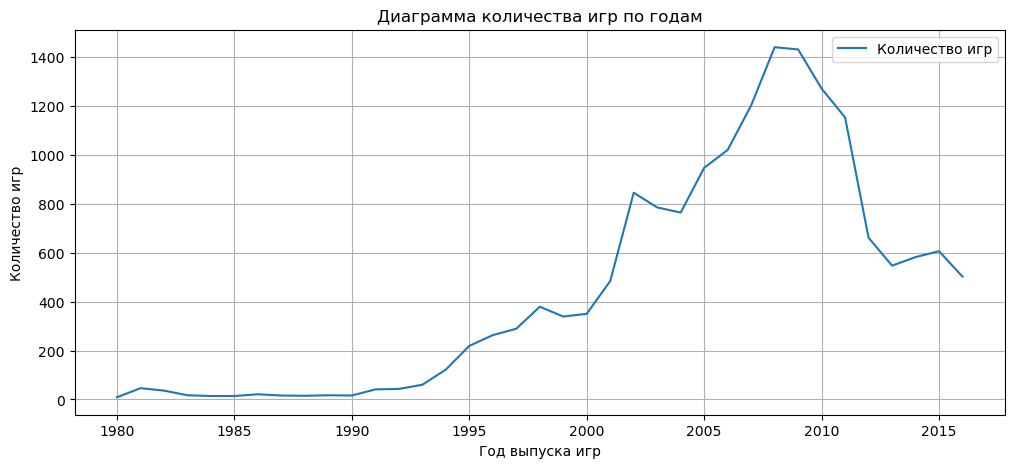

In [51]:
# create a diagram
ax = games_qty_pivot.plot(grid=True, figsize=(12, 5))

# set axes names
ax.set_xlabel("Год выпуска игр") 
ax.set_ylabel("Количество игр")  
ax.set_title("Диаграмма количества игр по годам")  

# legend translation to Russian
legend_label = ['Количество игр']  

# set the translated legend
ax.legend(labels=legend_label)

# diagram display
plt.show()  

**На диаграмме видно, что выпуск игр был минимальным с 1980 по 1994 (ниже 200). С 1995 года (219 игр) по 2008 год (1440 игр) начинается стремительный рост выпуска игр с небольшими падениями в 1999 - 2000 годах, 2003-2004 годах.
С 2009 года идёт падение до значения 502 игры в 2016 году.**

**Для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, нам необходимы данные за наиболее активные годы. Оптимально взять с 2000 по 2016.**

### 3.2. Изменение продаж по платформам.

In [52]:
# filter data for the year 2000 onwards
data_filtered = data[data['year_of_release'] >= 2000]

# create a pivot table
total_sales_pivot = data_filtered.pivot_table(index='platform', values='total_sales', aggfunc='sum')

# name a column
total_sales_pivot.columns = ['total_sales']

# create top-5 of platforms by sales
top_5 = total_sales_pivot.sort_values(by = 'total_sales', ascending = False).head()

# display top-5 platforms by sales
top_5

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.18
Wii,903.31
DS,804.26


**Создана сводная таблица с топ-5 платформ по продажам с 2000 года в миллионах копий:** 
**на первом месте PS2, затем X360, PS3, Wii, DS.**

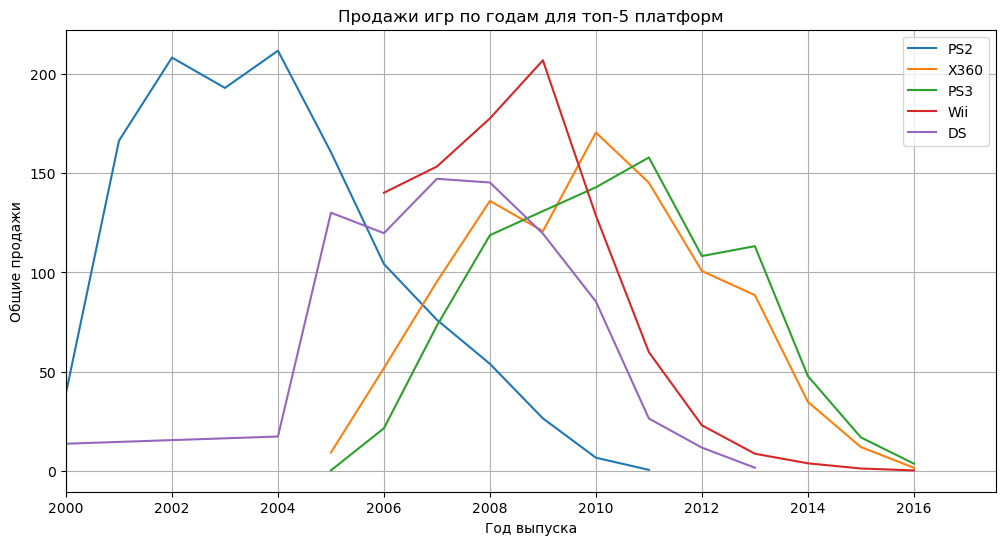

In [53]:
# make a list of top-5 platforms
top5_platforms = top_5.index.tolist()

# create pivot table with sales of top-5 platforms by year of release
data_top5 = data[data['platform'].isin(top5_platforms)]

# create line graphs for each platform
fig, ax = plt.subplots(figsize=(12, 6))  

for platform in top5_platforms:
    platform_data = data_top5[data_top5['platform'] == platform]
    sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    ax.plot(sales_by_year.index, sales_by_year.values, label=platform)

# name axes and title
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Общие продажи')
ax.set_title('Продажи игр по годам для топ-5 платформ')

# show legend
ax.legend()  

# show grid
ax.grid(True)  

# set x-axis limits from 2000
ax.set_xlim(2000, None)

# display graph
plt.show()  

**На графике видно, что у каждой популярной платформы есть свой жизненный цикл и пики популярности. При этом окончание продаж может означать как то, что пользователи перестали покупать на этих платформах, как и то, что разработчик закрыл доступ к платформе, чтобы продвинуть новую версию или другой продукт, или просто чтобы не поддерживать больше платформу, которая уже не очень популярна.** 

Наблюдения по каждой платформе из топ-5: 

- PS2 начала развиваться в 2000 году, достигла пика популярности через 2 года - с 2002 по 2004 годы (2 года) и потом начала её терять. Жизненный цикл закончился в 2011 году;

- DS начала развиваться в 2000 году, достигла пика популярности через 5 лет - с 2005 по 2008 годы (3 года) и потом начала её терять. Жизненный цикл закончился в 2013 году;

- X360 начала развиваться в 2005 году, достигла пика популярности через 3 года - с 2008 по 2011 годы (3 года) и потом начала её терять. Жизненный цикл закончился в 2016 году;

- PS3 начала развиваться в 2005 году, достигла пика популярности через 3 года - с 2008 по 2012 годы (4 года) и потом начала её терять. Жизненный цикл закончился в 2016 году;

- Wii начала развиваться в 2006 году, достигла пика популярности через 2 года - с 2008 примерно по 2009 годы (1 год) и потом начала её терять. Жизненный цикл закончился в 2016 году.

В среднем платформы из топ-5 были на пике популярности 2-3 года.
Новые платформы в топ-5 появлялись с промежутком 5 лет, одна через год после предыдущих.
Жизненный цикл платформ в среднем 11 лет (то есть в среднем через 11 лет на платформе перестают покупать игры).

### 3.3. Выбор потенциально прибыльных платформ.

Из предыдущего графика видно, что платформы из Топ-5 по продажам с 2000 года уже закончили свой жизненный цикл и на них ставить не имеет смысла, они уже принесли свою максимальную прибыль. Необходимо найти растущие платформы за последние годы. 

Кроме того, мы выяснили жизненный цикл платформы - 11 лет. И что пик популярности платформы обычно достигается через 2-3 года после её запуска и длится 2-3 года. 

Нам интересно найти платфомы близкие к пику или недавно вошедшие в пик. Для этого посмотрим продажи платформ за последние 2 года (с 2014 года), так как за 2 года после выпуска платформа должна стать максимально популярной.

In [54]:
# filter data for the year 2014 onwards
data_filtered_2014 = data[data['year_of_release'] >= 2014]

# create a pivot table
total_sales_pivot_2014 = data_filtered_2014.pivot_table(index='platform', values='total_sales', aggfunc='sum')

# name a column
total_sales_pivot_2014.columns = ['total_sales']

# display top-5 platforms by sales
total_sales_pivot_2014.sort_values(by='total_sales',ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.40
PSV,22.40
Wii,5.07


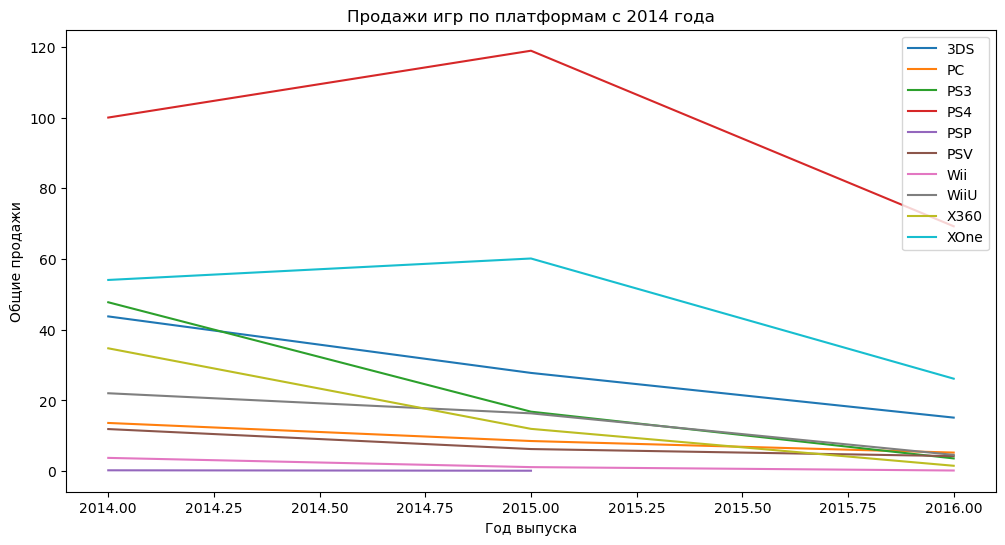

In [55]:
# group the filtered data by year and platform, and sum the total sales
sales_by_platform_year = data_filtered_2014.groupby(['year_of_release', 'platform'])['total_sales'].sum()

# create a line graph for each platform
platforms = sales_by_platform_year.index.get_level_values('platform').unique()

fig, ax = plt.subplots(figsize=(12, 6))

for platform in platforms:
    platform_sales = sales_by_platform_year.loc[:, platform]
    ax.plot(platform_sales.index.get_level_values('year_of_release'), platform_sales.values, label=platform)

# set labels and title
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Общие продажи')
ax.set_title('Продажи игр по платформам с 2014 года')

# show the legend
ax.legend()

# display the plot
plt.show()


**На графике видно, что среди, платформ, запущенных с 2014 года все платформы падают в продажах. 
Может быть, это связано с тем, что многие начали играть на мобильных устройствах.
В любом случае, PS4 и XOne выше остальных по продажам и ещё не закончили свой жизненный цикл. Они могут быть потенциально прибыльными.**

### 3.4. График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Построим график за интересующие нас 2 года (с 2014 года).

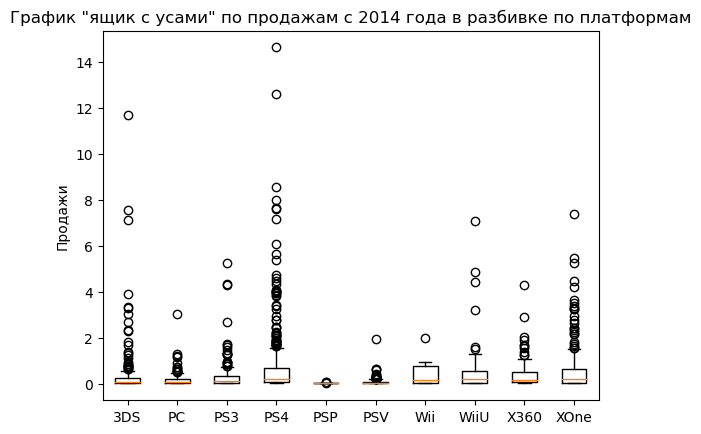

In [56]:
# group the filtered data by platform and get the sales data
sales_by_platform = data_filtered_2014.groupby('platform')['total_sales'].sum()

# create a list of sales data for each platform
sales_data = [data_filtered_2014[data_filtered_2014['platform'] == platform]['total_sales'] 
              for platform in sales_by_platform.index]

# create a box plot
plt.boxplot(sales_data)

# set the x-axis labels to the platform names
plt.xticks(range(1, len(sales_by_platform.index) + 1), sales_by_platform.index)

# set the y-axis label and title
plt.ylabel('Продажи')
plt.title('График "ящик с усами" по продажам с 2014 года в разбивке по платформам')

# display the plot
plt.show()

**На графике видно, что  медианы сумм глобальных продаж по платформам, выпущенным с 2014 года, почти одинаковы и находятся в основном немногим выше нуля. 
В распределниях по платформам достаточно много выбросов - аномальных значений (отображены точками). 
Больше всего "ящики" (то есть значения продаж от 1 до 3 квантилей) у платформ Wii, PS4 и XOne.
Минимальные значения у всех на 0, максимальные значения больше всего у PS4 и XOne.**

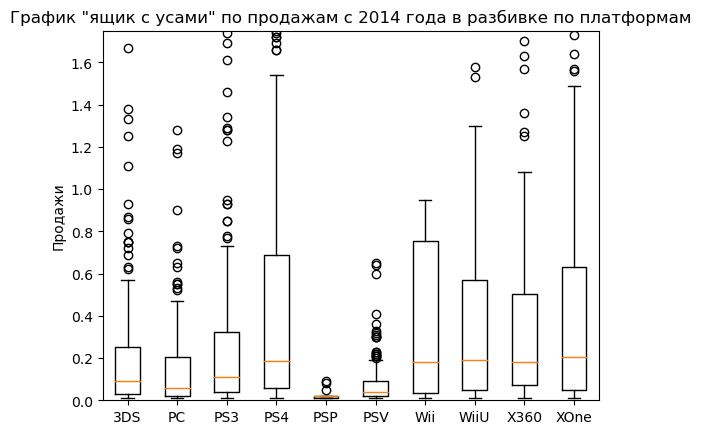

In [57]:
# create a box plot
plt.boxplot(sales_data)

# set the x-axis labels to the platform names
plt.xticks(range(1, len(sales_by_platform.index) + 1), sales_by_platform.index)

# set the y-axis label and title
plt.ylabel('Продажи')
plt.title('График "ящик с усами" по продажам с 2014 года в разбивке по платформам')

# set the y-axis limits to zoom in on the box plot
plt.ylim(bottom=0, top=1.75) 

# display the plot
plt.show()


**На графике видно, что  медианы сумм глобальных продаж по платформам, выпущенным с 2014 года, выше всего (0.2) и почти одинаковы у четырёх платформ: PS4, Wii, WiiU, X360, XOne. У остальных платформ медианы ниже.** 

В распределниях по платформам достаточно много выбросов - аномальных значений (отображены точками). 

Больше всего интерквартильный размах («центральные» 50% значений глобальных продаж) и самые высокие максимальные значения в размахе у платформ Wii (от 0.5 до почти 0.8), PS4 (от 0.1 до 0.7) и XOne (от 0.1 до 0.65).
Наибольшее наблюдаемое значение у PS4 (примерно 1.55), затем идёт Xone - 1.5 и WiiU - 1.3.
У Х360 относительно небольшой разброс в данных относительно платформ с такой же медианой.

### 3.5. Влияние на продажи внутри платформы PS4 отзывов пользователей и критиков с 2014 года.

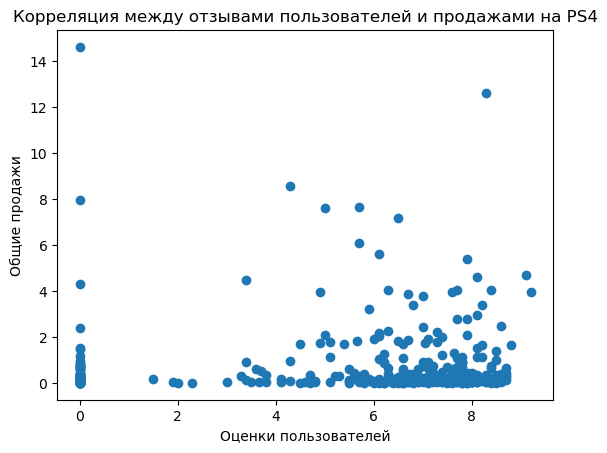

In [58]:
# select a specific platform from the 'platform' column
selected_platform = 'PS4'

# filter the data for the selected platform
platform_data = data_filtered_2014[data_filtered_2014['platform'] == selected_platform]

# create a scatter plot
plt.scatter(platform_data['user_score'], platform_data['total_sales'])

# Set the labels and title in Russian
plt.xlabel('Оценки пользователей')
plt.ylabel('Общие продажи')
plt.title('Корреляция между отзывами пользователей и продажами на ' + selected_platform)

# Display the plot
plt.show()

**На диаграмме рассеяния видно, что связи между отзывами пользователей и продажами на PS4 нет.** 

In [59]:
# calculate the correlation between user scores and total sales for the selected platform
correlation = platform_data['user_score'].corr(platform_data['total_sales'])

# print the correlation value
display('Корреляция между отзывами пользователей и продажами на платформе PS4:', correlation.round(2))

'Корреляция между отзывами пользователей и продажами на платформе PS4:'

0.09

**Согласно шкале Чеддока корреляция между отзывами пользователей и продажами на платформе PS4 очень слабая**.

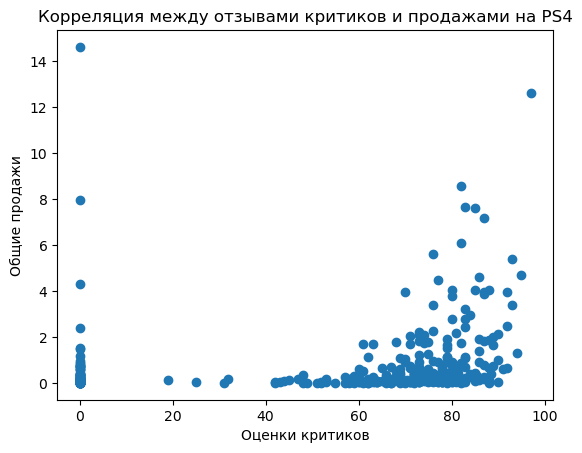

In [60]:
# create a scatter plot
plt.scatter(platform_data['critic_score'], platform_data['total_sales'])

# set the labels and title in Russian
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.title('Корреляция между отзывами критиков и продажами на ' + selected_platform)

# display the plot
plt.show()

**На диаграмме рассеяния видно, что есть небольшая прямая зависимость между отзывами критиков и продажами на PS4. Начиная от оценки больше 50 и до 80 примерно продажи иногда растут вместе с оценками критиков.**

In [61]:
# calculate the correlation between critic scores and total sales for the selected platform
correlation = platform_data['critic_score'].corr(platform_data['total_sales'])

# print the correlation value
display('Корреляция между отзывами критиков и продажами на платформе PS4:', correlation.round(2))

'Корреляция между отзывами критиков и продажами на платформе PS4:'

0.21

**Согласно шкале Чеддока корреляция между отзывами критиков и продажами на платформе PS4 умеренная**.

### 3.6. Влияние на продажи игр, выпущенных с 2014 года, на других платформах отзывов пользователей и критиков. 

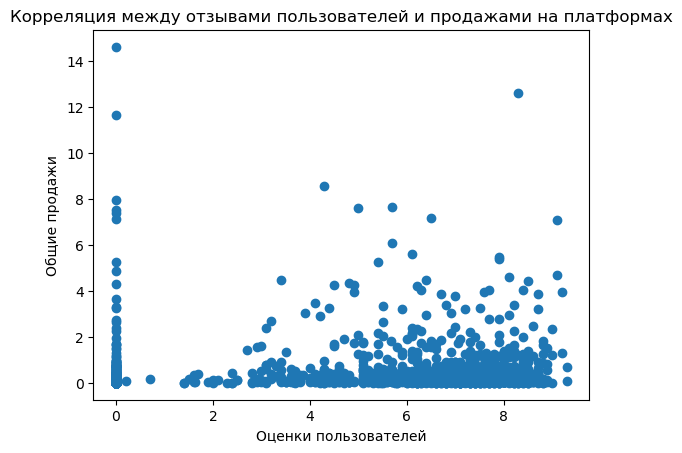

In [62]:
# create a scatter plot
plt.scatter(data_filtered_2014['user_score'], data_filtered_2014['total_sales'])

# set the labels and title in Russian
plt.xlabel('Оценки пользователей')
plt.ylabel('Общие продажи')
plt.title('Корреляция между отзывами пользователей и продажами на платформах')

# display the plot
plt.show()

**На диаграмме рассеяния видно, что связь между отзывами пользователей и продажами на платформах слабая. Есть единичные случаи, когда видна прямая положительная зависимость (рост продаж с ростом оценок пользователей).** 

In [63]:
# calculate the correlation between user scores and total sales for all platforms
correlation = data_filtered_2014['user_score'].corr(data_filtered_2014['total_sales'])

# print the correlation value
display('Корреляция между отзывами пользователей и продажами на всех платформах:', correlation.round(2))

'Корреляция между отзывами пользователей и продажами на всех платформах:'

0.14

**Согласно шкале Чеддока корреляция между отзывами пользователей и продажами на всех платформах слабая**.

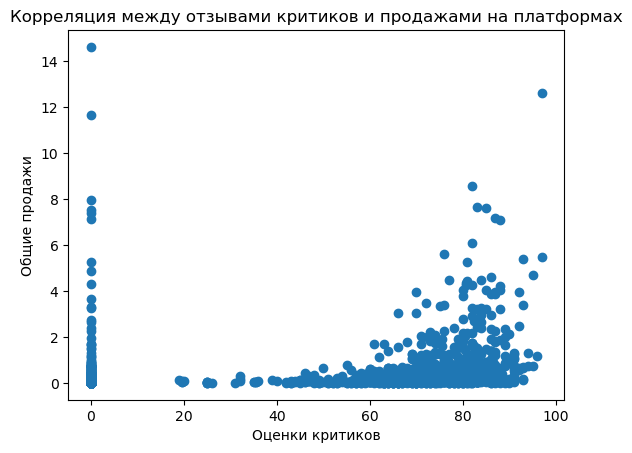

In [64]:
# create a scatter plot
plt.scatter(data_filtered_2014['critic_score'], data_filtered_2014['total_sales'])

# set the labels and title in Russian
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.title('Корреляция между отзывами критиков и продажами на платформах')

# display the plot
plt.show()

**На диаграмме рассеяния видно, что связь между отзывами критиков и продажами на платформах слабая. Есть единичные случаи, когда видна прямая положительная зависимость (рост продаж с ростом оценок критиков).** 

In [65]:
# calculate the correlation between critic scores and total sales for all platforms
correlation = data_filtered_2014['critic_score'].corr(data_filtered_2014['total_sales'])

# print the correlation value
display('Корреляция между отзывами критиков и продажами на всех платформах:', correlation.round(2))

'Корреляция между отзывами критиков и продажами на всех платформах:'

0.2

**Согласно шкале Чеддока корреляция между отзывами критиков и продажами на всех платформах слабая**.

### 3.7. Общее распределение игр, выпущенных с 2014 года, по жанрам. 

In [66]:
# create a pivot table
genre_sales_pivot = data_filtered_2014.pivot_table(index='genre', values=['name',
                                                            'total_sales'], aggfunc={'name':'count', 
                                                                                     'total_sales': ['mean','median']})
# name columns
genre_sales_pivot.columns = ['games_qty', 'total_sales_mean', 'total_sales_median']

# sort values by total_sales_mean
genre_sales_pivot_sorted_mean = genre_sales_pivot.sort_values(by='total_sales_mean', ascending=False)

# sort values by games_qty
genre_sales_pivot_sorted_qty = genre_sales_pivot.sort_values(by='games_qty', ascending=False)

#display a pivot table
genre_sales_pivot_sorted_mean

,games_qty,total_sales_mean,total_sales_median
genre,,,
Shooter,128,1.335469,0.515
Sports,161,0.680000,0.180
Platform,38,0.476053,0.140
Fighting,60,0.470333,0.125
Role-Playing,221,0.459005,0.110
Racing,69,0.398841,0.090
Misc,113,0.332301,0.090
Action,620,0.322113,0.090
Simulation,44,0.298409,0.100


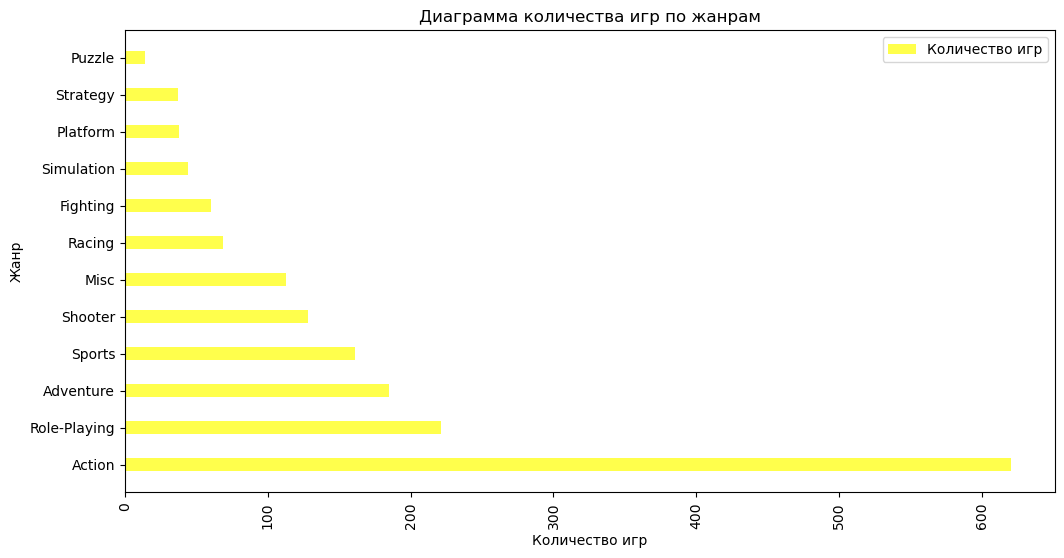

In [67]:
# set figsize and axes
fig, ax = plt.subplots(figsize=(12, 6))

# set columns width
bar_width = 0.35

# create a bar chart with labels in Russian and 90 degrees rotation
ax.barh(genre_sales_pivot_sorted_qty.index, genre_sales_pivot_sorted_qty['games_qty'], 
        bar_width, label='Количество игр', color='yellow', alpha=0.7)
ax.set_xlabel('Количество игр')
ax.set_ylabel('Жанр')

# labels rotation for 90 degrees
plt.xticks(rotation=90)

# title set
ax.set_title('Диаграмма количества игр по жанрам')

# legend set
legend_labels = ['Количество игр']
ax.legend(legend_labels, loc='upper right')

# diagram display
plt.show()


**Жанры, лидирующие по количеству игр: Action (с отрывом почти в 2,5 раза от остальных), Role-Playing, Adventure, затем Sports, Shooter, Misc.
Меньше всего игр в жанрах Puzzle, Strategy, Platform.** 

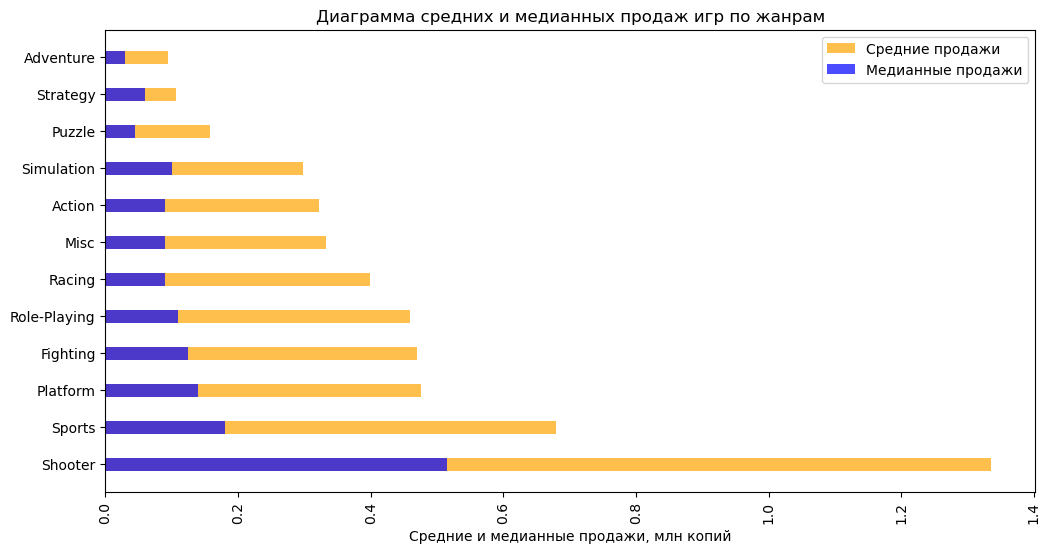

In [68]:
# set figsize and axes
fig, ax = plt.subplots(figsize=(12, 6))

# set columns width
bar_width = 0.35

# create a bar chart with labels in Russian and 90 degrees rotation
ax.barh(genre_sales_pivot_sorted_mean.index, genre_sales_pivot_sorted_mean['total_sales_mean'], 
        bar_width, label='Средние продажи', color='orange', alpha=0.7)
ax.set_xlabel('Средние и медианные продажи, млн копий / Количество игр, шт.')

# create a bar chart with labels in Russian and 90 degrees rotation
ax.barh(genre_sales_pivot_sorted_mean.index, genre_sales_pivot_sorted_mean['total_sales_median'], 
        bar_width, label='Медианные продажи', color='blue', alpha=0.7)
ax.set_xlabel('Средние и медианные продажи, млн копий')

# labels rotation for 90 degrees
plt.xticks(rotation=90)

# title set
ax.set_title('Диаграмма средних и медианных продаж игр по жанрам')

# legend set
legend_labels = ['Средние продажи', 'Медианные продажи']
ax.legend(legend_labels, loc='upper right')

# diagram display
plt.show()


**Среди игр, выпущенных с 2014 года, больше всего продаж (согласно расчету средней) в жанрах Shooter (отрыв в два раза от 2го места) и Sports.
Далее на одинаковых позициях Platform, Fighting и Role-Playing.
Медианные продажи распределяются практически пропорционально средним.** 

**Самые низкие продажи (средние и медианные) у Adveture, Strategy и Puzzle.** 

In [69]:
# Расчет корреляции между продажами и количеством игр по жанру
correlation = genre_sales_pivot_sorted_mean['total_sales_mean'].corr(genre_sales_pivot['games_qty'])

# Вывод значения корреляции
display('Корреляция между средними продажами и количеством игр по жанру:', correlation)


'Корреляция между средними продажами и количеством игр по жанру:'

0.011635002265733435

**Согласно шкале Чеддока корреляция между средними продажами и количеством игр по жанру на всех платформах отсутствует**.

## Шаг 4. Составление портрета пользователя каждого региона (NA, EU, JP).

### 4.1. Самые популярные платформы (топ-5) для пользователей каждого региона. 

Смотрим самые популярные платформы игр, выпущенных с 2014 года, в регионах по долям продаж от всех продаж в регионе.

In [70]:
# create  pivot table
na_sales_pivot = data_filtered_2014.pivot_table(index='platform', values='na_sales', aggfunc='sum')

# calculate total regional sales
total_na_sales = na_sales_pivot['na_sales'].sum()

# add column with sales share calculation
na_sales_pivot['na_sales_share'] = (na_sales_pivot['na_sales']/total_na_sales)*100

# create top5 platforms dataset 
top5_na_sales_pivot = na_sales_pivot.sort_values(by='na_sales_share', ascending=False).head()

#display top5
top5_na_sales_pivot

,na_sales,na_sales_share
platform,,
PS4,98.61,34.707166
XOne,81.27,28.604111
X360,28.30,9.960580
3DS,22.64,7.968464
PS3,22.05,7.760805


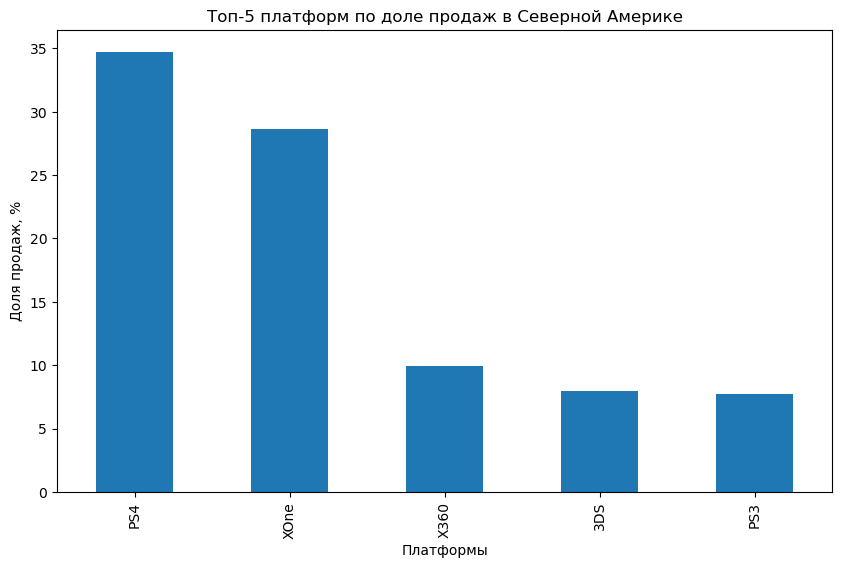

In [71]:
# create a bar chart
top5_na_sales_pivot['na_sales_share'].plot(kind='bar', figsize=(10, 6))

# set labels and a title
plt.xlabel('Платформы')
plt.ylabel('Доля продаж, %')
plt.title('Топ-5 платформ по доле продаж в Северной Америке')

# display a chart
plt.show()

**Самая большая доля продаж в Северной Америке среди игр, выпущенных с 2014 года, на платформе PS4 (34,7%), на втором месте - XOne (28,6%), на третьем - X360 (28,3%), затем 3DS (22,6%) и замыкает пятёрку лидеров PS3 (22%).**

In [72]:
# create  pivot table
eu_sales_pivot = data_filtered_2014.pivot_table(index='platform', values='eu_sales', aggfunc='sum')

# calculate total regional sales
total_eu_sales = eu_sales_pivot['eu_sales'].sum()

# add column with sales share calculation
eu_sales_pivot['eu_sales_share'] = (eu_sales_pivot['eu_sales']/total_eu_sales)*100

# create top5 platforms dataset 
top5_eu_sales_pivot = eu_sales_pivot.sort_values(by='eu_sales_share', ascending=False).head()

#display top5
top5_eu_sales_pivot

,eu_sales,eu_sales_share
platform,,
PS4,130.04,47.997638
XOne,46.25,17.070830
PS3,25.54,9.426789
PC,18.22,6.724984
3DS,16.12,5.949876


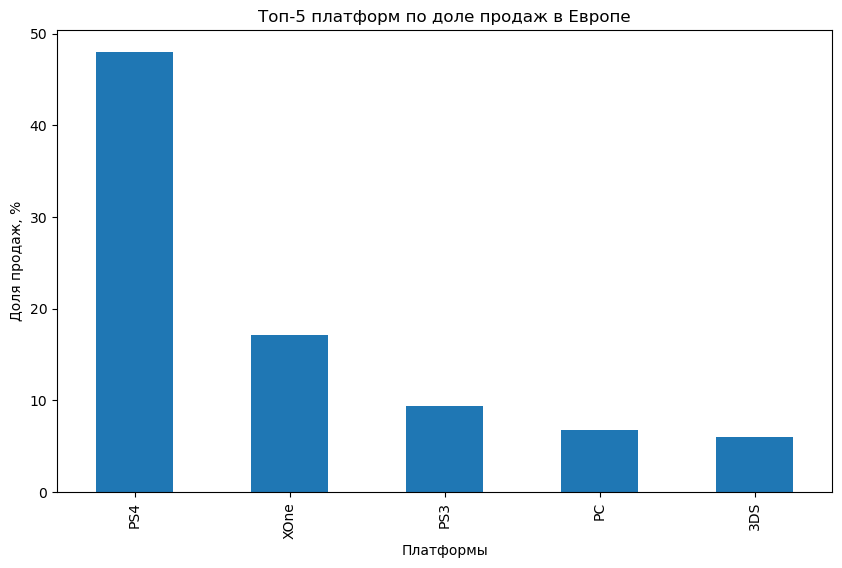

In [73]:
# create a bar chart
top5_eu_sales_pivot['eu_sales_share'].plot(kind='bar', figsize=(10, 6))

# set labels and a title
plt.xlabel('Платформы')
plt.ylabel('Доля продаж, %')
plt.title('Топ-5 платформ по доле продаж в Европе')

# display a chart
plt.show()

**Самая большая доля продаж в Европе на платформе PS4 (48 %), на втором месте - XOne (17%), на третьем - PS3 (9,4%), затем PC (6,7%) и замыкает пятёрку лидеров 3DS (5,9%).**

In [74]:
# create a pivot table
jp_sales_pivot = data_filtered_2014.pivot_table(index='platform', values='jp_sales', aggfunc='sum')

# calculate total regional sales
total_jp_sales = jp_sales_pivot['jp_sales'].sum()

# add column with sales share calculation
jp_sales_pivot['jp_sales_share'] = (jp_sales_pivot['jp_sales']/total_jp_sales)*100

# create top5 platforms dataset 
top5_jp_sales_pivot = jp_sales_pivot.sort_values(by='jp_sales_share', ascending=False).head()

#display top5
top5_jp_sales_pivot

,jp_sales,jp_sales_share
platform,,
3DS,44.24,47.523902
PS4,15.02,16.134923
PSV,14.54,15.619293
PS3,11.22,12.052852
WiiU,7.31,7.852616


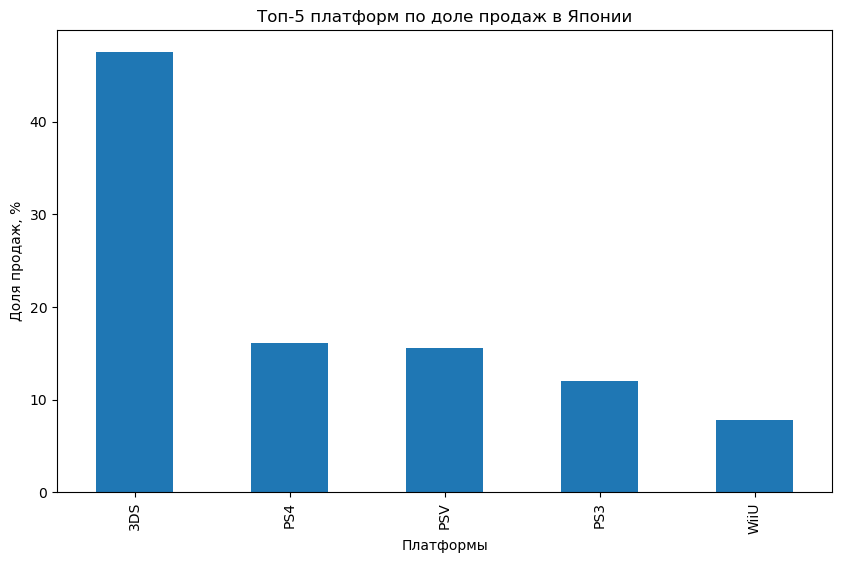

In [75]:
# create a bar chart
top5_jp_sales_pivot['jp_sales_share'].plot(kind='bar', figsize=(10, 6))

# set labels and a title
plt.xlabel('Платформы')
plt.ylabel('Доля продаж, %')
plt.title('Топ-5 платформ по доле продаж в Японии')

# display a chart
plt.show()

**Самая большая доля продаж в Японии на платформе 3DS (47,5 %), на втором месте - PS4 (16,1%), на третьем - PSV (15,6%), затем PS3 (12%) и замыкает пятёрку лидеров WiiU (7,9%).**

В целом доли продаж по местам в топ-5 регионов близки - первые места 34-48% и последние в пятерках по 6-7%. 

При этом состав популрных платформ разный: 
- во всех регионах в топах присутствуют PS4, PS3, 3DS; 
- в Европе и Северной Америке популярна Xone;
- X360 вошла в топ-5 только в Северной Америке;
- PC вошла в топ-5 только в Европе;
- PSV и WiiU вошла в топ-5 только в Японии.

### 4.2. Самые популярные жанры игр, выпущенных с 2014 года (топ-5), для пользователей каждого региона. 

In [76]:
# create  pivot table
na_genres_pivot = data_filtered_2014.pivot_table(index='genre', values='na_sales', aggfunc='sum')

# create top5 genres dataset 
top5_na_genres_pivot = na_genres_pivot.sort_values(by='na_sales', ascending=False).head()

#display top5
top5_na_genres_pivot

,na_sales
genre,
Shooter,79.02
Action,72.59
Sports,46.13
Role-Playing,33.47
Misc,15.05


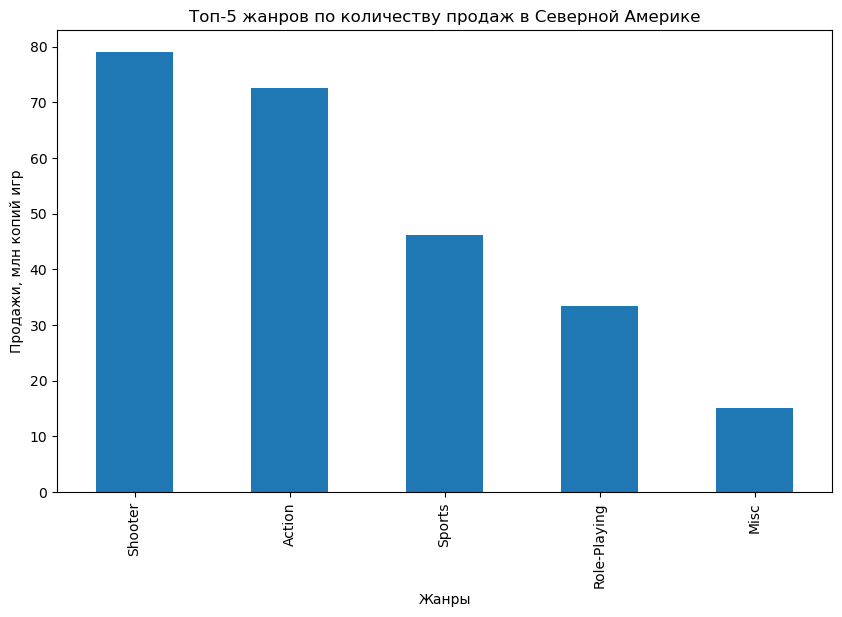

In [77]:
# create a bar chart
top5_na_genres_pivot['na_sales'].plot(kind='bar', figsize=(10, 6))

# set labels and a title in Russian
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн копий игр')
plt.title('Топ-5 жанров по количеству продаж в Северной Америке')

# display a chart
plt.show()

**В Северной Америке пользователи больше всего любят Shooter, Action и Sports (тройка жанров в лидерах по продажам). На 4 и 5 местах Role-Playing и Misc.** 

In [78]:
# create  pivot table
eu_genres_pivot = data_filtered_2014.pivot_table(index='genre', values='eu_sales', aggfunc='sum')

# create top5 genres dataset 
top5_eu_genres_pivot = eu_genres_pivot.sort_values(by='eu_sales', ascending=False).head()

#display top5
top5_eu_genres_pivot

,eu_sales
genre,
Action,74.93
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


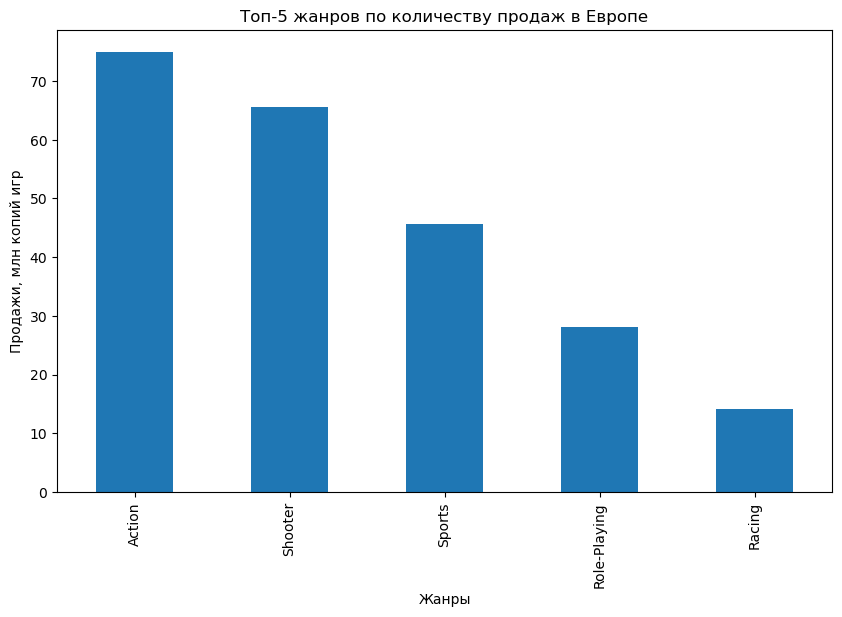

In [79]:
# create a bar chart
top5_eu_genres_pivot['eu_sales'].plot(kind='bar', figsize=(10, 6))

# set labels and a title in Russian
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн копий игр')
plt.title('Топ-5 жанров по количеству продаж в Европе')

# display a chart
plt.show()

**В Европе как и в Северной Америке пользователи больше всего любят Action, Shooter и Sports (тройка жанров в лидерах по продажам). На 4 и 5 местах Role-Playing и Racing (предпоследний также как и в Северной Америке). Racing встречается в топах только здесь.**

In [80]:
# create  pivot table
jp_genres_pivot = data_filtered_2014.pivot_table(index='genre', values='jp_sales', aggfunc='sum')

# create top5 genres dataset 
top5_jp_genres_pivot = jp_genres_pivot.sort_values(by='jp_sales', ascending=False).head()

#display top5
top5_jp_genres_pivot

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


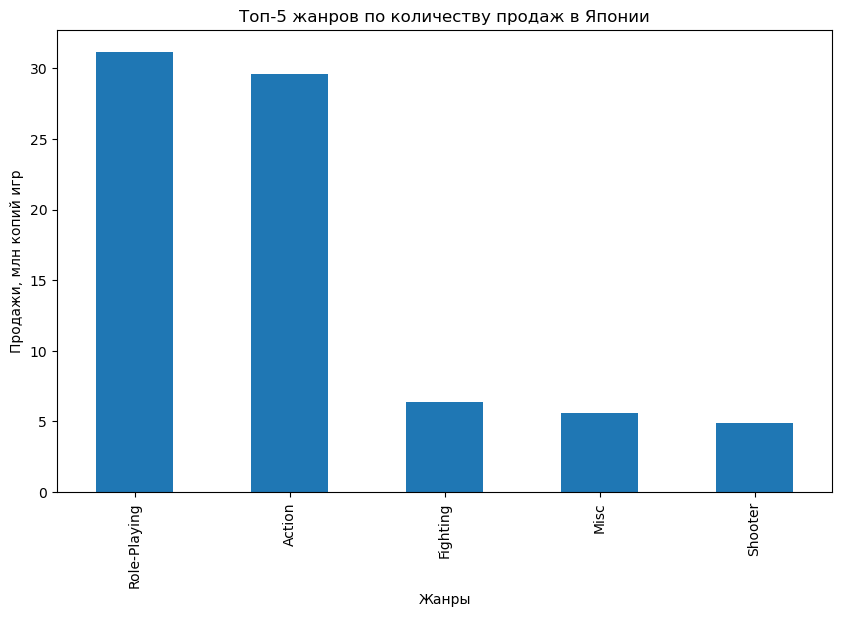

In [81]:
# create a bar chart
top5_jp_genres_pivot['jp_sales'].plot(kind='bar', figsize=(10, 6))

# set labels and a title in Russian
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн копий игр')
plt.title('Топ-5 жанров по количеству продаж в Японии')

# display a chart
plt.show()

**В Японии пользователи больше всего любят Role-Playing, Action и Fighting (тройка жанров в лидерах по продажам. Action пересекается с Европой и Северной Америкой). На 4 и 5 местах Misc и Shooter. Fighting встречается в топах только здесь.**

**В целом предпочтения по жанрам в регионах очень похожи. Самые популярные везде: Role-Playing, Shooter и Action. 
Особенность Японии - только тут в топе Fighting. 
Особенность Европы - только тут в топе Racing.
Misc любят в Японии и Северной Америке.
Sports любят в Европе и Северной Америке.**

### 4.3. Влияние рейтинга ESRB на продажи игр, выпущеннных с 2014 года, в отдельном регионе.

In [82]:
# create a pivot table
na_rating_sales_pivot = data_filtered_2014.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')

# sort values
na_rating_sales_pivot = na_rating_sales_pivot.sort_values(by='na_sales', ascending=False)

# display a pivot table
na_rating_sales_pivot

,na_sales
rating,
M,104.32
E,50.78
T,40.28
E10+,34.59


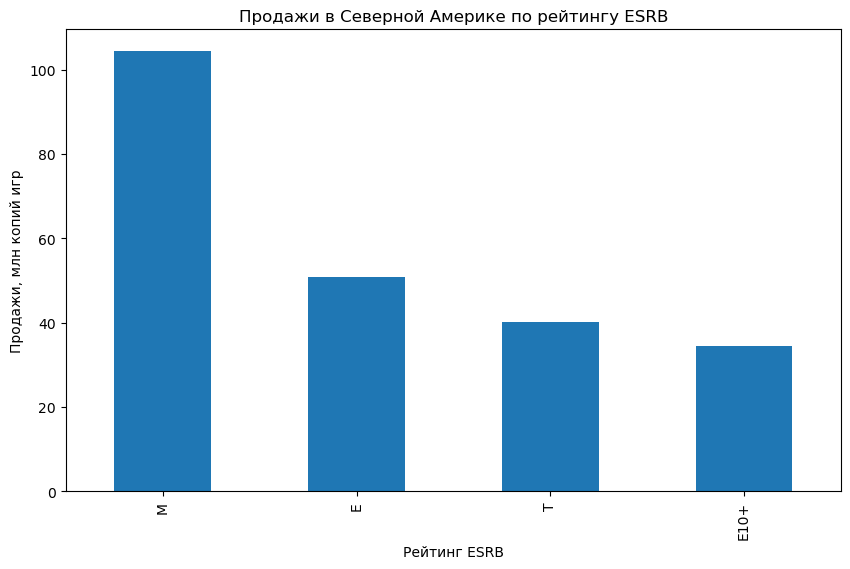

In [83]:
# create a bar chart
na_rating_sales_pivot['na_sales'].plot(kind='bar', figsize=(10, 6))

# set labels and a title in Russian
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн копий игр')
plt.title('Продажи в Северной Америке по рейтингу ESRB')

# display a chart
plt.show()

**Больше всего продаж в Северной Америке у игр с рейтингом ESRB** 
1. M (Mature - с 17 лет), 
2. затем E (Everyone - для всех), 
3. на третьем месте T (Teen - с 13 лет) 
4. и на 4 месте E10+ (Everyone 10+ для всех с 10 лет). 

В остальных группах нет продаж: 
K-A (Kids to Adults - ипользовался до 1998 года, заменён на E), 
EC (Early Childhood - с 3 лет), 
AO (Adults Only - с 18 лет)	
RP (Rating Pending - пока не присвоен рейтинг). 

In [84]:
# create a pivot table
eu_rating_sales_pivot = data_filtered_2014.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')

# sort values
eu_rating_sales_pivot = eu_rating_sales_pivot.sort_values(by='eu_sales', ascending=False)

# display a pivot table
eu_rating_sales_pivot

,eu_sales
rating,
M,102.10
E,58.30
T,35.33
E10+,27.53


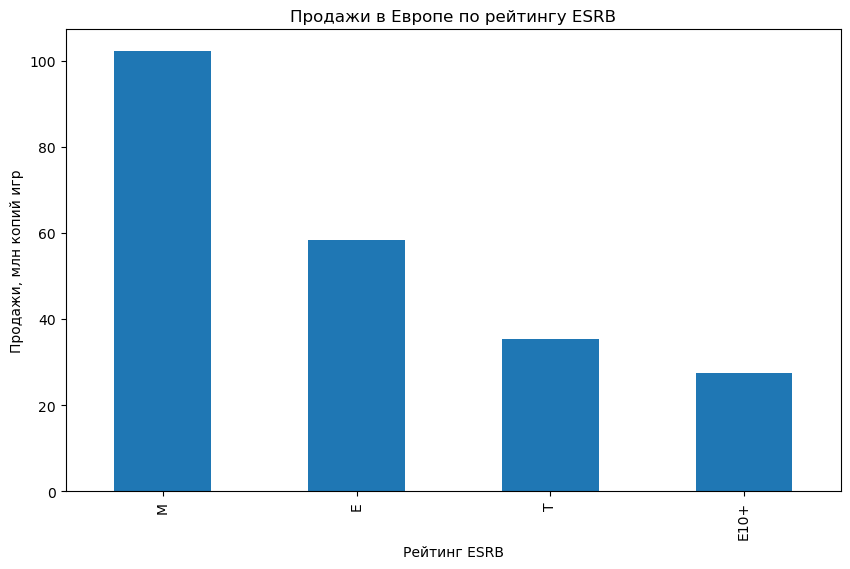

In [85]:
# create a bar chart
eu_rating_sales_pivot['eu_sales'].plot(kind='bar', figsize=(10, 6))

# set labels and a title in Russian
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн копий игр')
plt.title('Продажи в Европе по рейтингу ESRB')

# display a chart
plt.show()

**Больше всего продаж в Европе у игр с рейтингом ESRB** 
1. M (Mature - с 17 лет), 
2. затем E (Everyone - для всех), 
3. на третьем месте T (Teen - с 13 лет) 
4. и на 4 месте E10+ (Everyone 10+ для всех с 10 лет). 

В остальных группах нет продаж: 
K-A (Kids to Adults - ипользовался до 1998 года, заменён на E), 
EC (Early Childhood - с 3 лет), 
AO (Adults Only - с 18 лет)	
RP (Rating Pending - пока не присвоен рейтинг). 

In [86]:
# create a pivot table
jp_rating_sales_pivot = data_filtered_2014.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')

# sort values
jp_rating_sales_pivot = jp_rating_sales_pivot.sort_values(by='jp_sales', ascending=False)

# display a pivot table
jp_rating_sales_pivot

,jp_sales
rating,
T,16.28
E,8.98
M,8.61
E10+,4.77


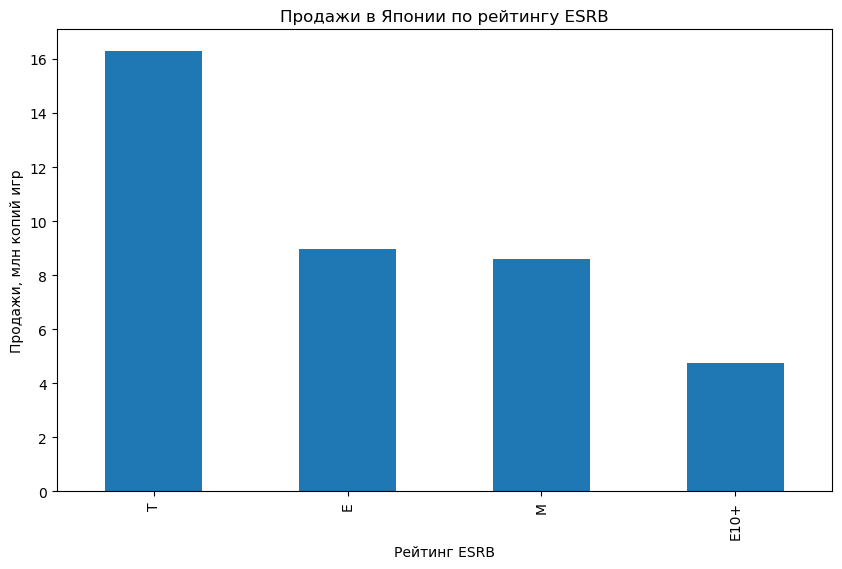

In [87]:
# create a bar chart
jp_rating_sales_pivot['jp_sales'].plot(kind='bar', figsize=(10, 6))

# set labels and a title in Russian
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн копий игр')
plt.title('Продажи в Японии по рейтингу ESRB')

# display a chart
plt.show()

**Больше всего продаж в Японии у игр с рейтингом ESRB** 
1. T (Teen - с 13 лет), 
2. затем E (Everyone - для всех), 
3. на третьем месте  M (Mature - с 17 лет) 
4. и на 4 месте E10+ (Everyone 10+ для всех с 10 лет). 

В остальных группах нет продаж: 
K-A (Kids to Adults - ипользовался до 1998 года, заменён на E), 
EC (Early Childhood - с 3 лет), 
AO (Adults Only - с 18 лет)	
RP (Rating Pending - пока не присвоен рейтинг). 

**В регионах продаются игры, выпущенные с 2014 года, с четырьмя рейтингами ESRB:**
1. M (Mature - с 17 лет), 
2. E (Everyone - для всех), 
3. T (Teen - с 13 лет) 
4. E10+ (Everyone 10+ для всех с 10 лет). 

Только в Японии 1 и 3 места меняются между собой. 

## Шаг 5. Проверка гипотез.

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

**Нулевая гипотеза** - средние значения пользовательских рейтингов (user_score) платформ Xbox One и PC **равны**.
Это двусторонняя гипотеза для двух генеральных совокупностей. Альтернативой для такой гипотезы всегда будет обратное - средние значения пользовательских рейтингов (user_score) платформ Xbox One и PC **не равны**. 

Для проверки двусторонней гипотезы для двух совокупностей используем ttest:

scipy.stats.ttest_ind(array1, array2).

Анализируем рейтинги для игр, выпущенных с 2014 года, на платформах Xbox One и PC.

Уровень статистической значимости установили на 0.05.


In [88]:
# filter user scores for platform Xbox One
user_score_xbox_one = data_filtered_2014.loc[data['platform'] == 'XOne', 'user_score']

# filter user scores for platform PC
user_score_pc = data_filtered_2014.loc[data['platform'] == 'PC', 'user_score']

# set alpha
alpha = .05 

# make ttest
results = st.ttest_ind(user_score_xbox_one, user_score_pc)

# display a p-value
print('p-значение:', results.pvalue)

# compare p-value with alpha
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.6182297067410211


'Не получилось отвергнуть нулевую гипотезу'

**p-value получилось больше alpha, нулевая гипотеза не отвергнута. 
Можно предположить, что средние значения пользовательских рейтингов (user_score) платформ Xbox One и PC равны.**

### 5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Нулевая гипотеза** - средние значения пользовательских рейтингов (user_score) жанров Action и Sports **равны**. Формулируем именно так, потому что нулевая гипотеза всегда положительная (средние равны). Это двусторонняя гипотеза для двух генеральных совокупностей. Альтернативой для такой гипотезы всегда будет обратное - средние значения пользовательских рейтингов (user_score) жанров Action и Sports **не равны**

Для проверки двусторонней гипотезы для двух совокупностей используем ttest:

scipy.stats.ttest_ind(array1, array2).

Анализируем рейтинги для игр, выпущенных с 2014 года, в жанрах Action и Sports.

Уровень статистической значимости установили на 0.05.


In [89]:
# filter user scores for genre Action
user_score_action = data_filtered_2014.loc[data['genre'] == 'Action', 'user_score']

# filter user scores for genre Sports
user_score_sports = data_filtered_2014.loc[data['genre'] == 'Sports', 'user_score']

# set alpha
alpha = .05 

# make ttest
results = st.ttest_ind(user_score_action, user_score_sports)

# display a p-value
print('p-значение:', results.pvalue)

# compare p-value with alpha
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.022003853596438566


'Отвергаем нулевую гипотезу'

**Нулевая гипотеза отвергнута,значит, мы действительно можем предположить, что cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (не равны).**

<div style="border:solid Chocolate 2px; padding: 40px">

## Общий вывод: 

Были проанализированы данные до 2016 года о продаже по всему миру компьютерных игр в интернет-магазине "Стримчик". 

**Цель анализа** - выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Предобработка данных:**

Названия колонок приведены к pep8, заменены форматы данных, удалены пропуски, создана колонка с суммой продаж по всем регионам. 

Остался достаточно большой процент пропусков, которые мы не можем удалить или заполнить в **'rating'**: 
- из 40% пропусков в **'rating'** осталось 37,9%.

**Исследовательский анализ данных.**

1. выпуск игр был минимальным с 1980 по 1994 (ниже 200). С 1995 года (219 игр) по 2008 год (1440 игр) начинается стремительный рост выпуска игр с небольшими падениями в 1999 - 2000 годах, 2003-2004 годах.
С 2009 года идёт падение до значения 502 игры в 2016 году.

Для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, нам необходимы данные за наиболее активные годы. Оптимально взять с 2000 по 2016.

2. создана сводная таблица с топ-5 платформ по продажам с 2000 года в миллионах копий: 
на первом месте PS2, затем X360, PS3, Wii, DS.

3. на графике видно, что у каждой популярной платформы есть свой жизненный цикл и пики популярности. При этом окончание продаж может означать как то, что пользователи перестали покупать на этих платформах, как и то, что разработчик закрыл доступ к платформе, чтобы продвинуть новую версию или другой продукт, или просто чтобы не поддерживать больше платформу, которая уже не очень популярна. 

Наблюдения по каждой платформе из топ-5: 

- PS2 начала развиваться в 2000 году, достигла пика популярности с 2002 по 2004 годы (2 года) и потом начала её терять. Жизненный цикл закончился в 2011 году;

- DS начала развиваться в 2000 году, достигла пика популярности с 2005 по 2008 годы (3 года) и потом начала её терять. Жизненный цикл закончился в 2013 году;

- X360 начала развиваться в 2005 году, достигла пика популярности с 2008 по 2011 годы (3 года) и потом начала её терять. Жизненный цикл закончился в 2016 году;

- PS3 начала развиваться в 2005 году, достигла пика популярности с 2008 по 2012 годы (4 года) и потом начала её терять. Жизненный цикл закончился в 2016 году;

- Wii начала развиваться в 2006 году, достигла пика популярности с 2008 примерно по 2009 годы (1 год) и потом начала её терять. Жизненный цикл закончился в 2016 году.

4. В среднем платформы из топ-5 были на пике популярности 2-3 года.
Новые платформы в топ-5 появлялись с промежутком 5 лет, одна через год после предыдущих.
Жизненный цикл платформ в среднем 11 лет (то есть в среднем через 11 лет на платформе перестают покупать игры).

Видно, что платформы из Топ-5 по продажам с 2000 года уже закончили свой жизненный цикл и на них ставить не имеет смысла, они уже принесли свою максимальную прибыль. Необходимо найти растущие платформы за последние годы. 

5. На графике видно, что среди, платформ, запущенных с 2014 года все платформы падают в продажах. 
Может быть, это связано с тем, что многие начали играть на мобильных устройствах.
В любом случае, PS4 и XOne выше остальных по продажам и ещё не закончили свой жизненный цикл. Они могут быть потенциально прибыльными.

6.  Влияние на продажи внутри платформы PS4 отзывов пользователей и критиков: 
 - связи между отзывами пользователей и продажами на PS4 нет. 
 - есть умеренная прямая корреляция между отзывами критиков и продажами на PS4. Начиная от оценки больше 50 и до 80 примерно продажи иногда растут вместе с оценками критиков.

7. Влияние отзывов пользователей и критиков на продажи игр на всех платформах: 
- связь между отзывами пользователей и продажами на платформах слабая. Есть единичные случаи, когда видна прямая положительная зависимость (рост продаж с ростом оценок пользователей). 
- связь между отзывами критиков и продажами на платформах слабая. Есть единичные случаи, когда видна прямая положительная зависимость (рост продаж с ростом оценок критиков). 

8. Общее распределение игр по жанрам. 

Жанры, лидирующие по количеству игр: Action (с отрывом почти в 2,5 раза от остальных), Role-Playing, Adventure, затем Sports, Shooter, Misc.
Меньше всего игр в жанрах Puzzle, Strategy, Platform. 
Среди игр, выпущенных с 2014 года, больше всего продаж (согласно расчету средней) в жанрах Shooter (отрыв в два раза от 2го места) и Sports.
Далее на одинаковых позициях Platform, Fighting и Role-Playing.
Медианные продажи распределяются практически пропорционально средним. 

Самые низкие продажи (средние и медианные) у Adveture, Strategy и Puzzle. 


**Портрет пользователя каждого региона (NA, EU, JP).**
1. Популярные платформы 
В целом доли продаж по местам в топ-5 регионов близки - первые места 34-48% и последние в пятерках по 6-7%. 

При этом состав популрных платформ разный: 
- во всех регионах в топах присутствуют PS4, PS3, 3DS; 
- в Европе и Северной Америке популярна Xone;
- X360 вошла в топ-5 только в Северной Америке;
- PC вошла в топ-5 только в Европе;
- PSV и WiiU вошла в топ-5 только в Японии.

2.Жанры 

В целом предпочтения по жанрам в регионах очень похожи. Самые популярные везде: Role-Playing, Shooter и Action. 
Особенность Японии - только тут в топе Fighting. 
Особенность Европы - только тут в топе Racing.
Misc любят в Японии и Северной Америке.
Sports любят в Европе и Северной Америке.

3. Влияние рейтинга ESRB на продажи в отдельном регионе

В регионах продаются игры, выпущенные с 2014 года, с четырьмя рейтингами ESRB:
1. M (Mature - с 17 лет), 
2. E (Everyone - для всех), 
3. T (Teen - с 13 лет) 
4. E10+ (Everyone 10+ для всех с 10 лет). 

Только в Японии 1 и 3 места меняются между собой. 


**Проверка гипотез**
1.  p-value получилось больше alpha, нулевая гипотеза не отвергнута. 
Можно предположить, что средние значения пользовательских рейтингов (user_score) платформ Xbox One и PC равны.

2. Нулевая гипотеза отвергнута,значит, мы действительно можем предположить, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (не равны).


<div style="border:solid green 2px; padding: 20px">

## Определяющие успешность игры закономерности:

- платформа PS4 - эта платформа находится в своём жизненном цикле, продажи начали падать, но ещё достаточно высоки. Кроме того, она популярна во всех регионах и находится в топах рейтингов по продажам; 
- дополнительно можно ставить на XOne для Европы и Северной Америки - платформа популярна там и также находится в своём жизненном цикле;
- жанры Role-Playing, Shooter и Action. Эти жанры лидируют по продажам во всех регионах;
- также можно делать ставку на жанр Sports - его любят в Европе и Северной Америке, этот жанр входит в топ-3 общих продаж игр, выпущенных с 2014 года; 
- Platform и Fighting на хороших позициях по средним продажам, Fighting популярен в Японии.

- рейтинг ESRB: 
1. M (Mature - с 17 лет), 
2. E (Everyone - для всех), 
3. T (Teen - с 13 лет).

Эти три рейтинга верхние по продажам во всех регионах. В Европе и Северной Америке популярнее M и E, в Японии T и E.

**Рекомендуется делать ставку на игры, отвечающие критериям выше, для планирования рекламных кампаний.**